In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('Cognifyz Technologies Dataset.csv')

df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])

# Dataset ko analyze karo: Sabse pehle dataset ko dekhna hoga. Usmein ek column hoga jo cuisine types ko mention karta hoga (jaise Indian, Chinese, Italian, etc.). Pehle is column ki sari entries ko check karna hai.

In [3]:
cuisine = df['Cuisines']


cuisine_list = [cuisine.strip() for sublist in cuisine for cuisine in sublist.split(', ')]

cuisine_list

['French',
 'Japanese',
 'Desserts',
 'Japanese',
 'Seafood',
 'Asian',
 'Filipino',
 'Indian',
 'Japanese',
 'Sushi',
 'Japanese',
 'Korean',
 'Chinese',
 'Asian',
 'European',
 'Seafood',
 'Filipino',
 'Asian',
 'European',
 'European',
 'Asian',
 'Indian',
 'Filipino',
 'Filipino',
 'Mexican',
 'American',
 'Ice Cream',
 'Desserts',
 'Filipino',
 'Mexican',
 'Filipino',
 'Korean',
 'Cafe',
 'American',
 'Italian',
 'Filipino',
 'Italian',
 'Pizza',
 'Filipino',
 'Cafe',
 'Korean',
 'Desserts',
 'Cafe',
 'Bakery',
 'American',
 'Italian',
 'Seafood',
 'American',
 'Mediterranean',
 'Japanese',
 'American',
 'Asian',
 'Italian',
 'Seafood',
 'Fast Food',
 'French',
 'Cafe',
 'Bakery',
 'Brazilian',
 'Pizza',
 'Japanese',
 'Arabian',
 'Japanese',
 'Brazilian',
 'Cafe',
 'Italian',
 'Pizza',
 'Bar Food',
 'Brazilian',
 'Mexican',
 'Grill',
 'International',
 'Peruvian',
 'Latin American',
 'American',
 'Grill',
 'Seafood',
 'International',
 'Italian',
 'American',
 'Burger',
 'Seafood'

# Cuisines count karo: Har cuisine kitni baar aa rahi hai, uska count calculate karo. Jitne zyada restaurants kisi ek cuisine ko serve karenge, wo utni common hogi

In [4]:
from collections import Counter


In [5]:
cuisine_count = Counter(cuisine_list)

cuisine_count

Counter({'North Indian': 3969,
         'Chinese': 2735,
         'Fast Food': 1986,
         'Mughlai': 995,
         'Italian': 764,
         'Bakery': 745,
         'Continental': 736,
         'Cafe': 703,
         'Desserts': 653,
         'South Indian': 636,
         'Street Food': 562,
         'American': 390,
         'Pizza': 381,
         'Mithai': 380,
         'Burger': 251,
         'Thai': 234,
         'Asian': 233,
         'Beverages': 229,
         'Ice Cream': 226,
         'Mexican': 181,
         'Biryani': 177,
         'Seafood': 174,
         'Healthy Food': 150,
         'European': 148,
         'Japanese': 135,
         'Finger Food': 114,
         'Raw Meats': 114,
         'Mediterranean': 112,
         'Salad': 93,
         'Sushi': 75,
         'Indian': 70,
         'Lebanese': 69,
         'Steak': 62,
         'Sandwich': 53,
         'Tea': 48,
         'Tibetan': 44,
         'Breakfast': 41,
         'Bar Food': 39,
         'BBQ': 33,
         'F

In [6]:
cuisine_count.most_common(1)

[('North Indian', 3969)]

# Top 3 find karo: Sabse zyada baar jo 3 cuisines aa rahi hain, unko "Top 3" consider karna hai.

In [7]:
Top_3_cuisine =  cuisine_count.most_common(3)
Top_3_cuisine

[('North Indian', 3969), ('Chinese', 2735), ('Fast Food', 1986)]

# Percentage calculate karo: Top 3 cuisines ka percentage find

In [8]:
# Find total number of Restaurant

Total_Restaurant = df['Restaurant ID'].nunique()
Total_Restaurant

9551

In [9]:
# Find total number of Cuisines
Total_Cuisines = len(cuisine_list)
Total_Cuisines

19719

In [10]:
# Step 2: Calculate percentage for top 3 cuisines
top_3_percentages = [(cuisine, (count / Total_Cuisines) * 100) for cuisine, count in Top_3_cuisine]

top_3_percentages

[('North Indian', 20.12779552715655),
 ('Chinese', 13.869871697347735),
 ('Fast Food', 10.071504640194737)]

# Identify the city with the highest number of restaurants in the dataset.

In [11]:
city_name = df['City'].unique()

print("Numbers of cities : ",df['City'].nunique())

df['City'].mode()

Numbers of cities :  141


0    New Delhi
Name: City, dtype: object

In [12]:
city_count = df['City'].value_counts()
max_idx = city_count.idxmax()
max_count = city_count.max()

print("The city which has highest restaurants : ",max_idx)
print('The numbers of Restaurants : ',max_count)

The city which has highest restaurants :  New Delhi
The numbers of Restaurants :  5473


# Calculate the average rating for restaurants in each city.

In [13]:
average_ratings = df.groupby('City')['Aggregate rating'].mean()

average_ratings

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64

In [14]:
print("The city which has highest rating :",average_ratings.idxmax())
print("Rating :",average_ratings.max())

The city which has highest rating : Inner City
Rating : 4.9


# Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

In [15]:
df['Price range'].unique().tolist()

[3, 4, 2, 1]

In [16]:
Feedback = []

for i in df['Price range']:
    if i == 1:
        Feedback.append('Low price')

    elif i == 2:
        Feedback.append('Medium low price')

    elif i == 3:
         Feedback.append('Medium high price')

    elif i == 4:
        Feedback.append('High price')


df['price ranges'] = Feedback


In [17]:
Frequency_count = df['price ranges'].value_counts()
Frequency_count


price ranges
Low price            4444
Medium low price     3113
Medium high price    1408
High price            586
Name: count, dtype: int64

# Visualization

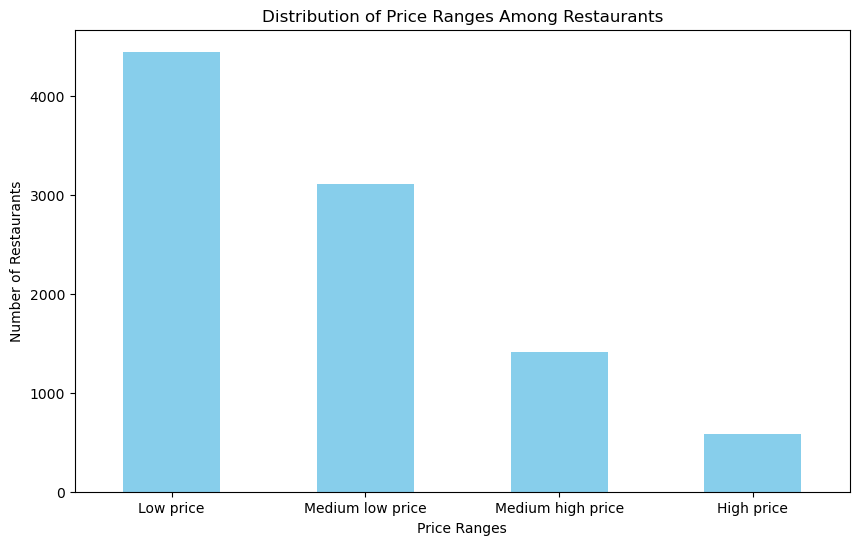

In [18]:
plt.figure(figsize=(10,6))
Frequency_count.plot(kind='bar',color='skyblue')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Ranges')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=360)
plt.show()

# Calculate the percentage of restaurants in each price range category.

In [19]:
total_restautants = df['Restaurant ID'].nunique()

total_restautants

9551

In [20]:
percentage = ( Frequency_count / total_restautants) *100

percentage

price ranges
Low price            46.529159
Medium low price     32.593446
Medium high price    14.741912
High price            6.135483
Name: count, dtype: float64

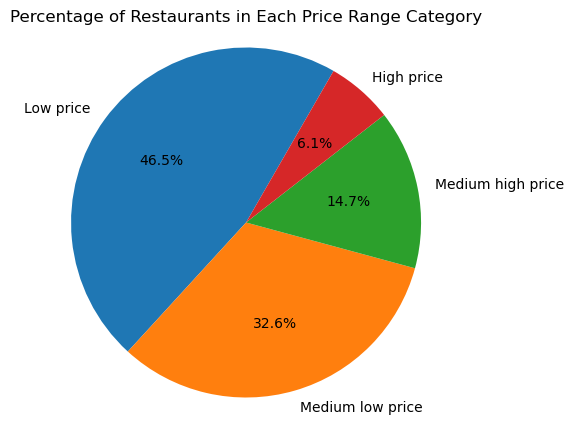

In [21]:
plt.figure(figsize=(6,5))
plt.pie(percentage,labels=percentage.index,autopct="%1.1f%%",startangle=60)
plt.title('Percentage of Restaurants in Each Price Range Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [22]:

# 1. Identify Restaurant Chains
# Group by 'Restaurant Name' and filter names that appear more than once
restaurant_chains = df.groupby('Restaurant Name').filter(lambda x: len(x) > 1)


In [24]:
# 2. Analyze Ratings and Popularity
# Group by 'Restaurant Name' and calculate average rating and total votes
chain_analysis = restaurant_chains.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',    # Average rating
    'Votes': 'sum'                 # Total votes (popularity)
}).reset_index()

# Sort by popularity (total votes)
chain_analysis_sorted = chain_analysis.sort_values(by='Votes', ascending=False)



In [25]:
chain_analysis_sorted

,Restaurant Name,Aggregate rating,Votes
62,Barbeque Nation,4.353846,28142
7,AB's - Absolute Barbecues,4.825000,13400
79,Big Chill,4.475000,10853
239,Farzi Cafe,4.366667,10098
692,Truffles,3.950000,9682
...,...,...,...
86,Bikaner Misthan Bhandar,0.000000,0
9,Aap Ki Khatir,0.000000,0
616,Street Cafe,0.000000,0
343,Jyoti Sweets,0.000000,0


# Task: Restaurant Ratings

# Analyze the distribution of aggregate ratings and determine the most common rating range.

In [26]:
common = df['Aggregate rating'].mode()

print("most common rating range : ", common)

most common rating range :  0    0.0
Name: Aggregate rating, dtype: float64


In [27]:
count = df['Aggregate rating'].value_counts()

count

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

# Calculate the average number of votes received by restaurants.

In [28]:
df['Votes'].mode()

0    0
Name: Votes, dtype: int64

In [29]:

df['Aggregate rating'].mode()

0    0.0
Name: Aggregate rating, dtype: float64

# Task: Cuisine Combination

# Identify the most common combinations of cuisines in the dataset.

In [30]:
cuisine_list = df['Cuisines'].dropna().str.split(", ").tolist()
cuisine_list 

[['French', 'Japanese', 'Desserts'],
 ['Japanese'],
 ['Seafood', 'Asian', 'Filipino', 'Indian'],
 ['Japanese', 'Sushi'],
 ['Japanese', 'Korean'],
 ['Chinese'],
 ['Asian', 'European'],
 ['Seafood', 'Filipino', 'Asian', 'European'],
 ['European', 'Asian', 'Indian'],
 ['Filipino'],
 ['Filipino', 'Mexican'],
 ['American', 'Ice Cream', 'Desserts'],
 ['Filipino', 'Mexican'],
 ['Filipino'],
 ['Korean'],
 ['Cafe', 'American', 'Italian', 'Filipino'],
 ['Italian', 'Pizza'],
 ['Filipino'],
 ['Cafe', 'Korean', 'Desserts'],
 ['Cafe', 'Bakery', 'American', 'Italian'],
 ['Seafood', 'American', 'Mediterranean', 'Japanese'],
 ['American', 'Asian', 'Italian', 'Seafood'],
 ['Fast Food', 'French'],
 ['Cafe'],
 ['Bakery'],
 ['Brazilian'],
 ['Pizza'],
 ['Japanese'],
 ['Arabian'],
 ['Japanese'],
 ['Brazilian', 'Cafe'],
 ['Italian'],
 ['Pizza'],
 ['Bar Food', 'Brazilian'],
 ['Mexican', 'Grill'],
 ['International'],
 ['Peruvian', 'Latin American'],
 ['American', 'Grill'],
 ['Seafood'],
 ['International'],
 ['I

In [31]:
import pandas as pd
from itertools import combinations
from collections import Counter


In [34]:
# Generate combinations
all_combinations = []
for cuisines in cuisine_list:
    combos = combinations(cuisines, 2)  # Get combinations of 2
    all_combinations.extend(combos)



# count the combinations
combo_counts = Counter(all_combinations)

In [38]:
# Display the most common combinations
most_common = combo_counts.most_common(10)
for combo,count in most_common:
    print(f"{combo} : {count}")

('North Indian', 'Chinese') : 1516
('North Indian', 'Mughlai') : 728
('North Indian', 'Fast Food') : 377
('Chinese', 'Fast Food') : 331
('North Indian', 'South Indian') : 314
('North Indian', 'Continental') : 288
('Chinese', 'North Indian') : 268
('Bakery', 'Desserts') : 263
('Mughlai', 'Chinese') : 258
('South Indian', 'Chinese') : 239


# Task : Online Delivery

In [40]:

data = pd.read_csv('Cognifyz Technologies Dataset.csv')


In [41]:
import pandas as pd
import folium


# Filter the required columns (latitude and longitude)
restaurant_locations = data[['Latitude', 'Longitude', 'Restaurant Name']].dropna()

# Initialize a map centered around a mean latitude and longitude
map_center = [restaurant_locations['Latitude'].mean(), restaurant_locations['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)

# Add restaurant locations as markers on the map
for _, row in restaurant_locations.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Restaurant Name']
    ).add_to(restaurant_map)

# Save map as HTML file
restaurant_map.save("restaurant_map.html")

# Display the map in Jupyter Notebook if you're using it
# restaurant_map  # Uncomment this if using Jupyter


C:\Users\ANURAG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


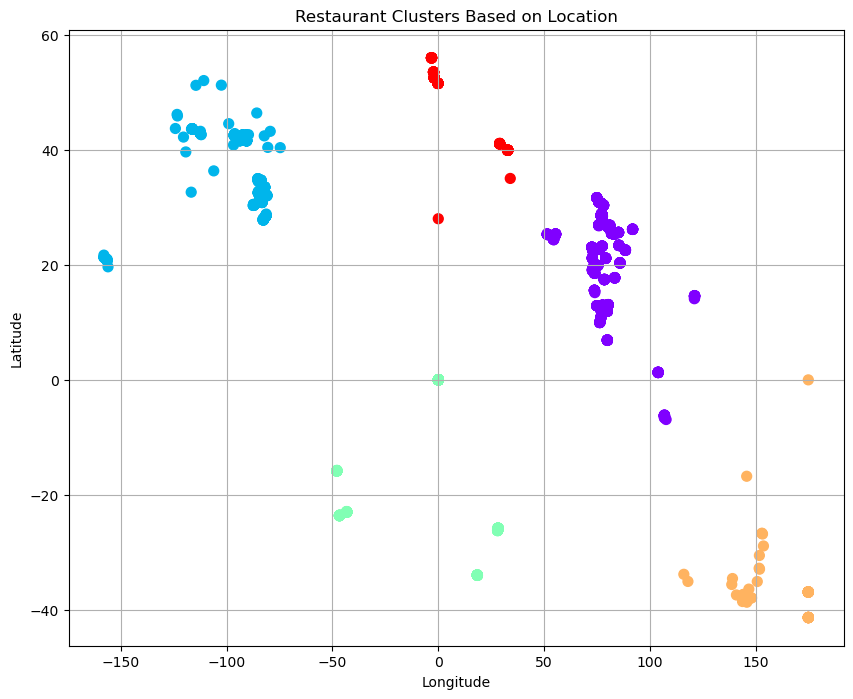

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Extract the relevant columns: Latitude and Longitude
restaurant_locations = data[['Latitude', 'Longitude']].dropna()

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5)  # Adjust the number of clusters as needed
kmeans.fit(restaurant_locations)

# Add the cluster labels to the dataset
restaurant_locations['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(restaurant_locations['Longitude'], restaurant_locations['Latitude'], 
            c=restaurant_locations['Cluster'], cmap='rainbow', s=50)
plt.title('Restaurant Clusters Based on Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


# Task : Online Delivery

In [43]:

df = pd.read_csv('Cognifyz Technologies Dataset.csv')


# Determine the percentage of restaurants that offer online delivery.

In [44]:
# Total Restaurant 
total_Restaurant = len(df)

# Total Restaurant that give online delivery
online_delivery = len(df[df['Is delivering now'] == 'Yes'])

# percentage 
percentage = (online_delivery / total_Restaurant  ) * 100

print(f"Percentage of restaurants with online delivery: {percentage:.2f}%")

Percentage of restaurants with online delivery: 0.36%


# Compare the average ratings of restaurants with and without online delivery.


In [45]:
avg_rating_with_delivery  = df[df['Is delivering now'] == "Yes"]['Aggregate rating'].mean()
avg_rating_without_delivery = df[df['Is delivering now'] == "No"]['Aggregate rating'].mean()

In [46]:

print(f"Average rating with online delivery: {avg_rating_with_delivery:.2f}")
print(f"Average rating without online delivery: {avg_rating_without_delivery:.2f}")

Average rating with online delivery: 3.15
Average rating without online delivery: 2.66


# Task: Restaurant Reviews

In [47]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob

# Load dataset
df=pd.read_csv("Cognifyz Technologies Dataset.csv")

# Assuming the reviews are in a column named 'Review Text'
# If not, replace 'Review Text' with the correct column name

# 1. Extract Positive and Negative Keywords
# Tokenize the reviews
df['tokens'] = df['Rating text'].apply(word_tokenize)

# Filter out stopwords (common words like 'the', 'is', etc.)
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Use TextBlob for simple sentiment analysis to categorize reviews as positive/negative
df['sentiment'] = df['Rating text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Positive reviews: sentiment > 0; Negative reviews: sentiment < 0
positive_reviews = df[df['sentiment'] > 0]
negative_reviews = df[df['sentiment'] < 0]

# Find most common positive and negative words
positive_words = pd.Series([word for tokens in positive_reviews['tokens'] for word in tokens]).value_counts()
negative_words = pd.Series([word for tokens in negative_reviews['tokens'] for word in tokens]).value_counts()

print("Most common positive words:", positive_words.head(10))
print("Most common negative words:", negative_words.head(10))

# 2. Calculate Average Review Length (by number of words)
df['review_length'] = df['Rating text'].apply(lambda x: len(word_tokenize(x)))
average_length = df['review_length'].mean()

print(f"Average review length: {average_length:.2f} words")

# 3. Explore Relationship Between Review Length and Rating
# Group by rating and calculate the average review length per rating group
review_length_by_rating = df.groupby('Aggregate rating')['review_length'].mean().reset_index()

print("Average review length by rating:")
review_length_by_rating


Most common positive words: Good         3179
Excellent     301
Name: count, dtype: int64
Most common negative words: Average    3737
Poor        186
Name: count, dtype: int64
Average review length: 1.34 words
Average review length by rating:


,Aggregate rating,review_length
0,0.0,2.0
1,1.8,1.0
2,1.9,1.0
3,2.0,1.0
4,2.1,1.0
5,2.2,1.0
6,2.3,1.0
7,2.4,1.0
8,2.5,1.0
9,2.6,1.0


# Task: Votes Analysis

In [49]:

# Step 1: Restaurants with the highest and lowest number of votes
max_votes_restaurant = df[df['Votes'] == df['Votes'].max()]
min_votes_restaurant = df[df['Votes'] == df['Votes'].min()]



print("Restaurant with the highest number of votes:")
max_votes_restaurant[['Restaurant Name', 'Votes', 'Aggregate rating']]


Restaurant with the highest number of votes:


,Restaurant Name,Votes,Aggregate rating
728,Toit,10934,4.8


In [50]:

# Step 2: Correlation between number of votes and rating
correlation = df['Votes'].corr(df['Aggregate rating'])

print(f"\nCorrelation between number of votes and aggregate rating: {correlation:.2f}")



Correlation between number of votes and aggregate rating: 0.31


# Task: Price Range vs. Online Delivery and Table Booking

# Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [51]:

# Step 1: Analyze the relationship between price range and online delivery
online_delivery_price_range = df.groupby(['Has Online delivery', 'Price range']).size().reset_index(name='Count')

print("Online delivery vs. Price range:")
print(online_delivery_price_range)

# Step 2: Analyze the relationship between price range and table booking
table_booking_price_range = df.groupby(['Has Table booking', 'Price range']).size().reset_index(name='Count')

print("\nTable booking vs. Price range:")
print(table_booking_price_range)

# Step 3: Percentage of restaurants offering online delivery and table booking across different price ranges
online_delivery_percentage = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100
table_booking_percentage = df.groupby('Price range')['Has Table booking'].value_counts(normalize=True).unstack() * 100

print("\nPercentage of restaurants with online delivery by price range:")
print(online_delivery_percentage)

print("\nPercentage of restaurants with table booking by price range:")
print(table_booking_percentage)


Online delivery vs. Price range:
  Has Online delivery  Price range  Count
0                  No            1   3743
1                  No            2   1827
2                  No            3    997
3                  No            4    533
4                 Yes            1    701
5                 Yes            2   1286
6                 Yes            3    411
7                 Yes            4     53

Table booking vs. Price range:
  Has Table booking  Price range  Count
0                No            1   4443
1                No            2   2874
2                No            3    764
3                No            4    312
4               Yes            1      1
5               Yes            2    239
6               Yes            3    644
7               Yes            4    274

Percentage of restaurants with online delivery by price range:
Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2      

# Determine if higher-priced restaurants are more likely to offer these services.

In [52]:

# Step 1: Percentage of restaurants offering online delivery by price range
online_delivery_percentage = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100

print("\nPercentage of restaurants with online delivery by price range:")
print(online_delivery_percentage)

# Step 2: Percentage of restaurants offering table booking by price range
table_booking_percentage = df.groupby('Price range')['Has Table booking'].value_counts(normalize=True).unstack() * 100

print("\nPercentage of restaurants with table booking by price range:")
print(table_booking_percentage)



Percentage of restaurants with online delivery by price range:
Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369

Percentage of restaurants with table booking by price range:
Has Table booking         No        Yes
Price range                            
1                  99.977498   0.022502
2                  92.322518   7.677482
3                  54.261364  45.738636
4                  53.242321  46.757679
